In [1]:
#Imports

#Data exploration
import time
import sklearn
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#Machine Learning
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler

#Graphical Formatting
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15,6))
%matplotlib inline

In [2]:
%pip install jupyter-cjk-xelatex

Note: you may need to restart the kernel to use updated packages.


In [3]:
%reload_ext watermark
%watermark -a "Marketing Analytics for Food Delivery by Vitor Marques" --iversions

sklearn    0.23.1
pandas     1.0.5
seaborn    0.10.1
matplotlib 3.2.2
numpy      1.18.5
Marketing Analytics for Food Delivery by Vitor Marques


## Loading Dataset

### Data dictionary

#### Localida = ID_Place
#### Quantidade_item = Quantity_items
#### Latitude = Latitude
#### Longitude = Longitude
#### Horario_pedido = order_time

In [4]:
#Dataset
df_food_delivery = pd.read_csv('dados/dataset.csv');

In [5]:
#Data Visualization
df_food_delivery.head(10)

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059
5,0x6d6979,2019-03-18 00:27:00,6,pizza,2,41.784576,-87.607565
6,0x6d6979,2019-03-18 00:27:00,6,sobremesa,2,41.784576,-87.607565
7,0x78dd1e,2019-09-22 00:10:00,2,bebida,2,42.049306,-87.677606
8,0x78dd1e,2019-09-22 00:10:00,2,pizza,2,42.049306,-87.677606
9,0x78dd1e,2019-09-22 00:10:00,2,sobremesa,2,42.049306,-87.677606


In [6]:
df_food_delivery.shape

(260645, 7)

In [7]:
df_food_delivery.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [8]:
#Unique values
df_food_delivery.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

In [9]:
df_food_delivery.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

#### Pivoting the dataset

In [10]:
order_all = df_food_delivery.pivot_table(index='id_transacao', columns='nome_item', values = 'quantidade_item')

In [11]:
order_all

nome_item,bebida,pizza,salada,sobremesa
id_transacao,,,,
0x10000a,NaN,1.0,NaN,1.0
0x100058,NaN,2.0,NaN,2.0
0x1000c8,4.0,4.0,1.0,5.0
0x10014c,NaN,1.0,NaN,1.0
0x1001d8,3.0,3.0,NaN,3.0
...,...,...,...,...
0xffe96,4.0,4.0,NaN,4.0
0xffeed,NaN,1.0,NaN,1.0
0xfff07,1.0,1.0,NaN,1.0


In [12]:
order_all2 = order_all.fillna(0).reset_index()

In [13]:
order_all2

nome_item,id_transacao,bebida,pizza,salada,sobremesa
0,0x10000a,0.0,1.0,0.0,1.0
1,0x100058,0.0,2.0,0.0,2.0
2,0x1000c8,4.0,4.0,1.0,5.0
3,0x10014c,0.0,1.0,0.0,1.0
4,0x1001d8,3.0,3.0,0.0,3.0
...,...,...,...,...,...
99995,0xffe96,4.0,4.0,0.0,4.0
99996,0xffeed,0.0,1.0,0.0,1.0
99997,0xfff07,1.0,1.0,0.0,1.0
99998,0xfff4d,0.0,2.0,0.0,2.0


In [14]:
order_all2.columns

Index(['id_transacao', 'bebida', 'pizza', 'salada', 'sobremesa'], dtype='object', name='nome_item')

In [15]:
order_all2.head()

nome_item,id_transacao,bebida,pizza,salada,sobremesa
0,0x10000a,0.0,1.0,0.0,1.0
1,0x100058,0.0,2.0,0.0,2.0
2,0x1000c8,4.0,4.0,1.0,5.0
3,0x10014c,0.0,1.0,0.0,1.0
4,0x1001d8,3.0,3.0,0.0,3.0


In [16]:
order_all2.nunique()

nome_item
id_transacao    100000
bebida               6
pizza                6
salada               6
sobremesa            5
dtype: int64

In [17]:
order_all2.shape

(100000, 5)

In [18]:
order_all2.describe()

nome_item,bebida,pizza,salada,sobremesa
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.239590,1.857840,0.711370,2.569210
std,1.627886,1.588589,1.086524,1.332084
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,2.000000
75%,3.000000,3.000000,1.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [19]:
order_all2.isnull().sum()

nome_item
id_transacao    0
bebida          0
pizza           0
salada          0
sobremesa       0
dtype: int64

In [20]:
#Appending column Localidade with merge
order_all2 = order_all2.merge(df_food_delivery[['id_transacao', 'localidade']])

In [21]:
order_all2

,id_transacao,bebida,pizza,salada,sobremesa,localidade
0,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,4.0,4.0,1.0,5.0,9
...,...,...,...,...,...,...
260640,0xfff07,1.0,1.0,0.0,1.0,2
260641,0xfff4d,0.0,2.0,0.0,2.0,3
260642,0xfff4d,0.0,2.0,0.0,2.0,3
260643,0xfffb8,0.0,1.0,0.0,1.0,2


In [22]:
order_all2.head(3)

,id_transacao,bebida,pizza,salada,sobremesa,localidade
0,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0.0,2.0,0.0,2.0,6


In [23]:
order_all2.nunique()

id_transacao    100000
bebida               6
pizza                6
salada               6
sobremesa            5
localidade           9
dtype: int64

In [24]:
order_all2.isnull().sum()

id_transacao    0
bebida          0
pizza           0
salada          0
sobremesa       0
localidade      0
dtype: int64

In [25]:
df_food_delivery['mes'] = df_food_delivery['horario_pedido'].apply(lambda x:time.strftime('%m', time.strptime(x, '%Y-%m-%d %H:%M:%S')))

In [26]:
order_all2

,id_transacao,bebida,pizza,salada,sobremesa,localidade
0,0x10000a,0.0,1.0,0.0,1.0,9
1,0x10000a,0.0,1.0,0.0,1.0,9
2,0x100058,0.0,2.0,0.0,2.0,6
3,0x100058,0.0,2.0,0.0,2.0,6
4,0x1000c8,4.0,4.0,1.0,5.0,9
...,...,...,...,...,...,...
260640,0xfff07,1.0,1.0,0.0,1.0,2
260641,0xfff4d,0.0,2.0,0.0,2.0,3
260642,0xfff4d,0.0,2.0,0.0,2.0,3
260643,0xfffb8,0.0,1.0,0.0,1.0,2


### Index adjustment

In [27]:
df_order = order_all2.reset_index()

In [28]:
df_order.head()

,index,id_transacao,bebida,pizza,salada,sobremesa,localidade
0,0,0x10000a,0.0,1.0,0.0,1.0,9
1,1,0x10000a,0.0,1.0,0.0,1.0,9
2,2,0x100058,0.0,2.0,0.0,2.0,6
3,3,0x100058,0.0,2.0,0.0,2.0,6
4,4,0x1000c8,4.0,4.0,1.0,5.0,9


## Data Analysis

### Distplot for segmentation

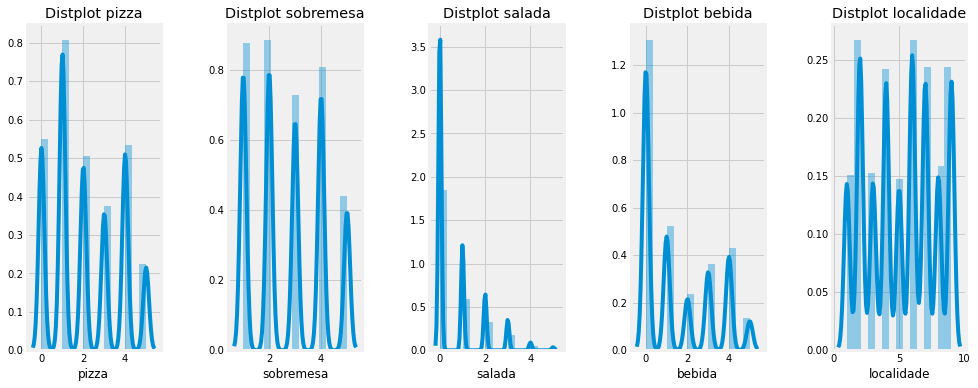

In [29]:
# Plot

# Figure Size
plt.figure(1, figsize = (15,6))

#Counter
n = 0

# Loop by columns

for x in ['pizza', 'sobremesa', 'salada', 'bebida', 'localidade']:
    n +=1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace=0.5,wspace = 0.5)
    sns.distplot(df_order[x], bins = 15)
    plt.title('Distplot {}'.format(x))
plt.show()

### Countplot

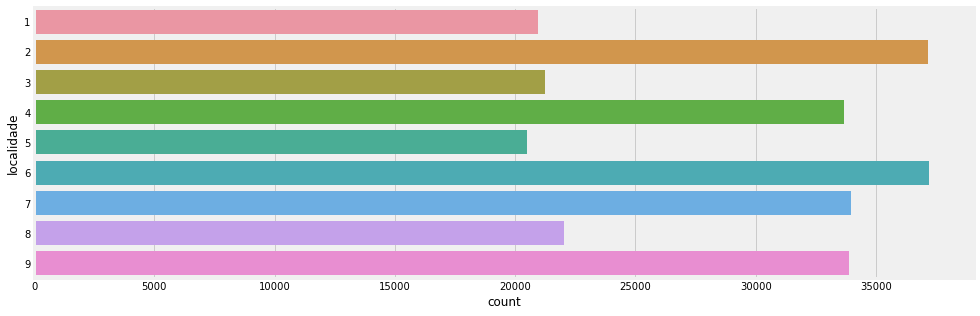

In [30]:
plt.figure(1, figsize=(15,5))
sns.countplot(y = 'localidade',data =df_order)
plt.show()

### Regplot for segmentation

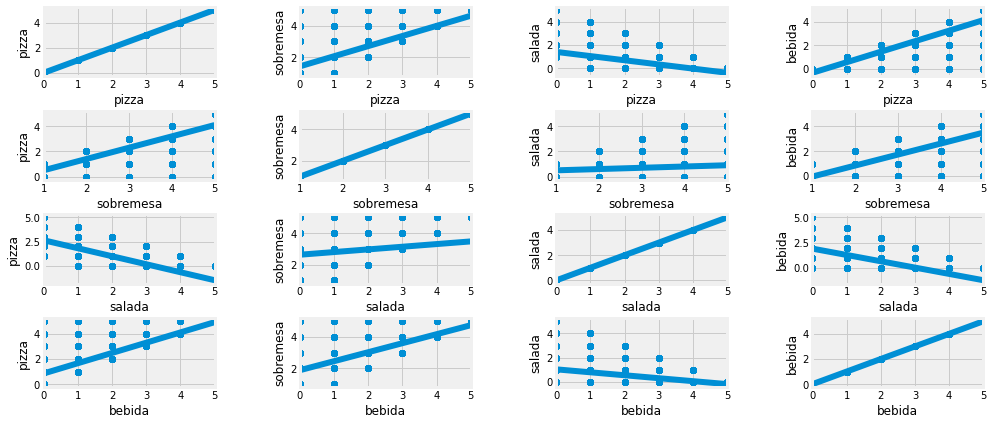

In [31]:
#Figura Size
plt.figure(1, figsize = (15,7))

# Counter
n = 0

for x in  ['pizza', 'sobremesa', 'salada', 'bebida']:
    for y in ['pizza', 'sobremesa', 'salada', 'bebida']:
        n +=1
        plt.subplot(4,4,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x=x, y=y, data = df_order)
        plt.ylabel(y)
plt.show()

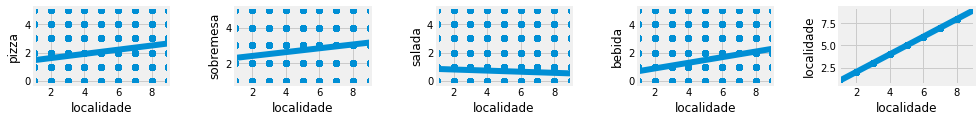

In [32]:
plt.figure(1, figsize = (15,10))

# Counter
n = 0

for x in  ['localidade']:
    for y in ['pizza', 'sobremesa', 'salada', 'bebida', 'localidade']:
        n +=1
        plt.subplot(5,5,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x=x, y=y, data = df_order)
        plt.ylabel(y)
plt.show()

### Feature Selection

In [33]:
df_order.columns

Index(['index', 'id_transacao', 'bebida', 'pizza', 'salada', 'sobremesa',
       'localidade'],
      dtype='object')

In [34]:
df_order_feature = df_order[['index', 'bebida', 'pizza', 'salada', 'sobremesa', 'localidade']]

In [35]:
df_order_feature.head()

,index,bebida,pizza,salada,sobremesa,localidade
0,0,0.0,1.0,0.0,1.0,9
1,1,0.0,1.0,0.0,1.0,9
2,2,0.0,2.0,0.0,2.0,6
3,3,0.0,2.0,0.0,2.0,6
4,4,4.0,4.0,1.0,5.0,9


## Cluster Analysis

- K-means
- Mean-Shift Clustering
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)
- Agglomerative Hierarchical Clustering
Reference:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

https://scikit-learn.org/stable/modules/mixture.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

## 1º Segmentation

In [36]:
X1 = df_order_feature[['pizza', 'sobremesa']].iloc[:,:].values

In [37]:
X1

array([[1., 1.],
       [1., 1.],
       [2., 2.],
       ...,
       [2., 2.],
       [1., 1.],
       [1., 1.]])

In [38]:
wcss = []

In [39]:
#1º Machine Learning Model

model = KMeans(n_clusters= 2,
                  init = 'k-means++',
                  n_init= 10,
                  max_iter= 300,                    
                  tol = 0.0001,
                  random_state = 111,
                  algorithm = 'elkan')

In [40]:
#Fitting Model
model.fit(X1)

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

In [41]:
labels = model.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
centers = model.cluster_centers_
centers

array([[0.9613099 , 1.87537776],
       [3.76652414, 4.07619962]])

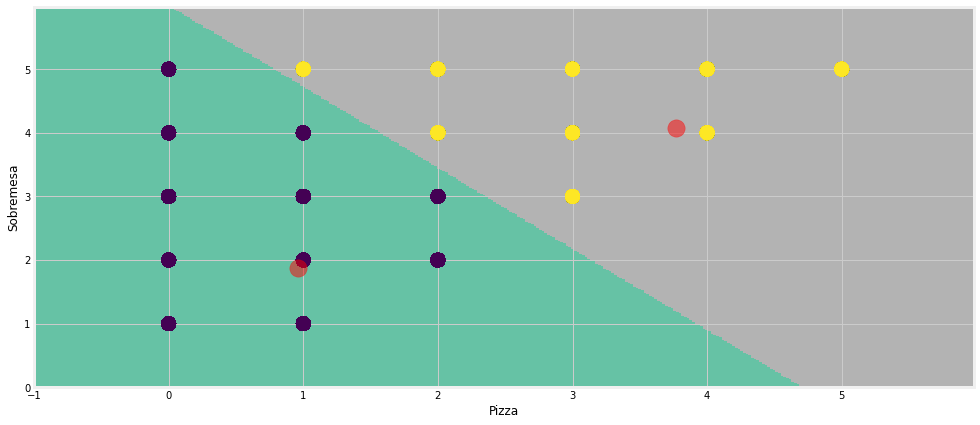

In [43]:
# Plot

# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'sobremesa', data = df_order_feature , c = labels, s = 200 )
plt.scatter(x = centers[: , 0], y =  centers[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.show()

For the 1º Segmentation, we can see that when there is no purchase of Pizza's, soon there is a greater number of purchases in desserts, however, those who usually buy more pizza happen to end up buying more dessert. For an improvement in sales, if it is possible to offer a free dessert when buying a 3, 4 or 5 pizza of greater value than the others.

## 2º Segmentation

In [44]:
X2 = df_order_feature[['pizza', 'salada']].iloc[:,:].values

In [45]:
model.fit(X2);
labelsx2 = model.labels_;
centersx2 = model.cluster_centers_

In [46]:
labelsx2

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
centersx2

array([[0.97591999, 0.97495629],
       [3.86666734, 0.18314636]])

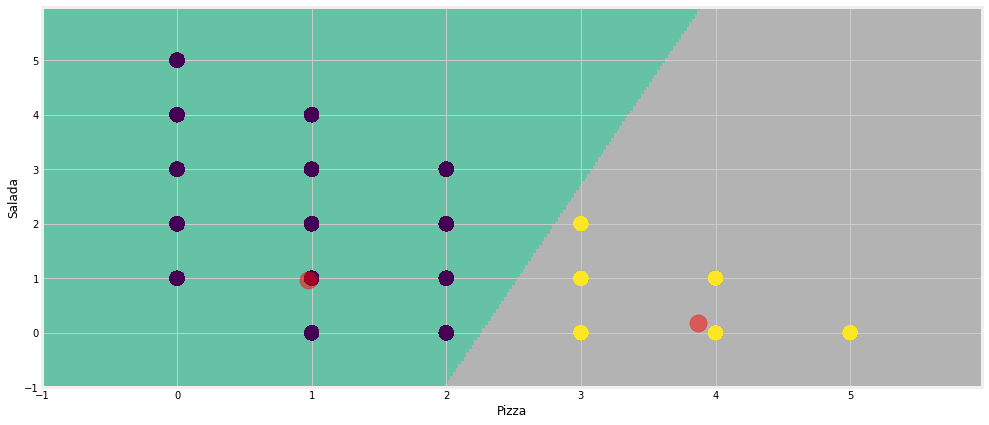

In [48]:
# Plot

# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'salada', data = df_order_feature , c = labelsx2, s = 200 )
plt.scatter(x = centersx2[: , 0], y =  centersx2[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Salada')
plt.show()

Different of previous segmentation, in this case the analysis informs that those who order more salads as a meal, usually also order less pizza's. If the situation is for the meals to be healthier, we can create the situation in which when buying a second pizza, a salad is won, thus encouraging conscious and healthy consumption

## 3º Segmentation

In [49]:
model3 = KMeans(n_clusters=4,
               init='k-means++',
               n_init=10,
                max_iter=300,
                tol=0.00001,
                algorithm='elkan'
            )
X3 = df_order_feature[['pizza', 'localidade']].iloc[:,:].values

In [50]:
model3.fit(X3);
labelsx3 = model3.labels_;
centrsx3= model3.cluster_centers_;

In [51]:
labelsx3

array([0, 0, 0, ..., 1, 1, 1])

In [52]:
centrsx3

array([[0.90639264, 6.54022191],
       [0.92032286, 2.14283736],
       [3.6877518 , 3.51603578],
       [3.67495742, 7.83203167]])

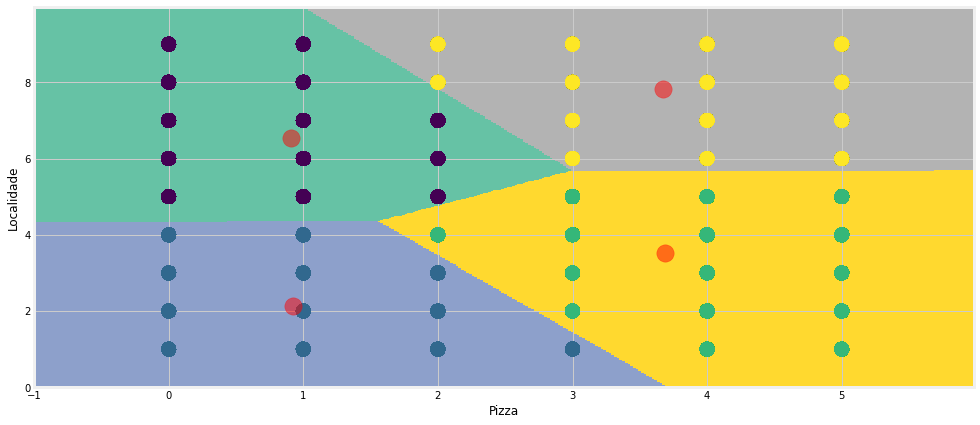

In [53]:
# Plot

# Parâmetros do Meshgrid
h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model3.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

# Plot da imagem
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, 
           aspect = 'auto', 
           origin = 'lower')

# Plot dos pontos de dados
plt.scatter( x = 'pizza', y = 'localidade', data = df_order_feature , c = labelsx3, s = 200 )
plt.scatter(x = centrsx3[: , 0], y =  centrsx3[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Localidade')
plt.show()

For the 3º Segmentation, all locations order pizza, however it should be noted that at some point in the day, these locations fail to place orders. In order for there to be a greater number of orders at times when demand is 0, you can create a promotion stating that from time X to Y the orders are 15% off, thus increasing the number of orders at those times